# Proyecto Sprint 7 


## Plataformas de videojuegos 


**Descripción de los datos**
— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

### Importación de Librerías 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


### Leemos el dataset games.csv

In [2]:
data_raw = pd.read_csv('games.csv')

## Paso 2: Preparación de los datos\n

- Reemplazo de nombres de columnas por minúsculas.\n
- Conversión de tipos de datos.\n
- Tratamiento de valores ausentes y la abreviatura 'TBD'.\n
- Cálculo de las ventas totales en todas las regiones.
   

In [3]:
print(data_raw.head()) # Hacemos un head() para conocer un poco sobre las columnas que tiene nuestro dataset y entender un poco más de que tratan los datos.

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [4]:
data_raw.info() #Hacemos un info() para conocer el tipo de datosque tenmos por columna y ver los valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data_raw.describe() #Hacemos un describe para más información.

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
datos_duplicados = data_raw.duplicated().sum() # Quiero saber si existen filas duplicadas
print(f'Las filas duplicadas son: {datos_duplicados} ')

Las filas duplicadas son: 0 


In [7]:
datos_nulos = data_raw.isna().sum() # Quiero saber cuantas celdas con datos nulos hay por columna
print(f'Los valores ausentes son: \n\n{datos_nulos}')

Los valores ausentes son: 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [8]:
data_raw.columns = data_raw.columns.str.lower()

<div style="background-color: lightblue; color: black; padding: 10px; border-radius: 5px;">
    <strong>Cambiamos los nombres de las columnas para que sean todas las letras minúsculas y no tener problemas con los nombres..</strong>
</div>


In [9]:
print(data_raw.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [10]:
data_raw['name'].fillna('Nombre Desconocido', inplace=True)

/var/folders/qf/13fjj4297kdf8x0b_2k95_kr0000gn/T/ipykernel_13993/803573884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['name'].fillna('Nombre Desconocido', inplace=True)


In [11]:
data_raw['genre'].fillna('Genero Desconocido', inplace=True)

/var/folders/qf/13fjj4297kdf8x0b_2k95_kr0000gn/T/ipykernel_13993/1236635586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['genre'].fillna('Genero Desconocido', inplace=True)


<div style="background-color: lightblue; color: black; padding: 10px; border-radius: 5px;">
    <strong>Rellenamos los datos ausentes de tipo de datos string por el texto "Genero, Nombre Desconocido".</strong>
</div>


In [12]:
data_raw['year_of_release'] = data_raw['year_of_release'].fillna(0).astype('int')

<div style="background-color: lightblue; color: black; padding: 10px; border-radius: 5px;">
    <strong>Cambiamos el tipo de datos de la columna year_of_release ya que la columna tiene un tipo de datos float y necesitamos que sea un entero (int).</strong>
</div>


In [13]:
data_raw['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
data_raw['user_score'].replace('tbd', np.nan, inplace=True)
data_raw['user_score'] = data_raw['user_score'].astype('float')

/var/folders/qf/13fjj4297kdf8x0b_2k95_kr0000gn/T/ipykernel_13993/3844759081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['user_score'].replace('tbd', np.nan, inplace=True)


<div style="background-color: lightblue; color: black; padding: 10px; border-radius: 5px;">
    <strong>Como podemos observar tenemos strings en los datos de user_score donde tenemos datos ausentes nan y datos to be determined, donde tiene un tipo de datos objeto (object).
    Entonces procedemos a remplazar "tbd" por nan y cambiamos el tipo de datos tipo object a float. </strong>
</div>


In [15]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
data_raw['rating'].fillna('Rating Desconocido', inplace=True)

/var/folders/qf/13fjj4297kdf8x0b_2k95_kr0000gn/T/ipykernel_13993/2231555255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['rating'].fillna('Rating Desconocido', inplace=True)


<div style="background-color: lightblue; color: black; padding: 10px; border-radius: 5px;">
    <strong>Reemplazamos los datos ausentes por "Rating Desconocido" ya que estos datos son del tipo object donde pueden tener strings y otros datos.</strong>
</div>


In [17]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [18]:
data_raw['venta_total'] = data_raw[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

<div style="background-color: lightblue; color: black; padding: 10px; border-radius: 5px;">
    <strong>Creamos una columna de las ventas totales de eu_sales, na_sales y jp_sales..</strong>
</div>


In [19]:
data_raw.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,venta_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Rating Desconocido,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Rating Desconocido,31.38


In [20]:
best_games_5 = data_raw.nlargest(5, ['venta_total'])
best_games_5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,venta_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Rating Desconocido,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Rating Desconocido,31.38


In [21]:
number_of_games_per_year = data_raw.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index()
number_of_games_per_year

,year_of_release,name
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


In [22]:
number_of_games_per_year.columns = ['year_of_release', 'videogames_qty']
number_of_games_per_year

,year_of_release,videogames_qty
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


In [23]:
number_of_games_per_year.query('year_of_release != 0', inplace=True)
number_of_games_per_year

,year_of_release,videogames_qty
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


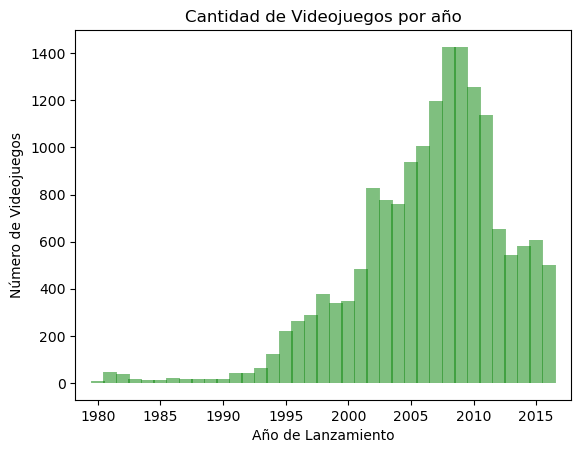

In [24]:
plt.vlines(x=number_of_games_per_year.year_of_release, ymin=0, ymax=number_of_games_per_year.videogames_qty, alpha=0.5, linewidth=10, color='green')
plt.title('Cantidad de Videojuegos por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Videojuegos')
plt.show()


<div style="background-color: lightblue; color: black; padding: 10px; border-radius: 5px;">
    <strong>Este gráfico muestra el número de videojuegos por año.</strong>
</div>


In [25]:
sales_for_platform = data_raw.groupby('platform')['venta_total'].sum().sort_values(ascending=False).reset_index()
sales_for_platform_5 = sales_for_platform.head(5)

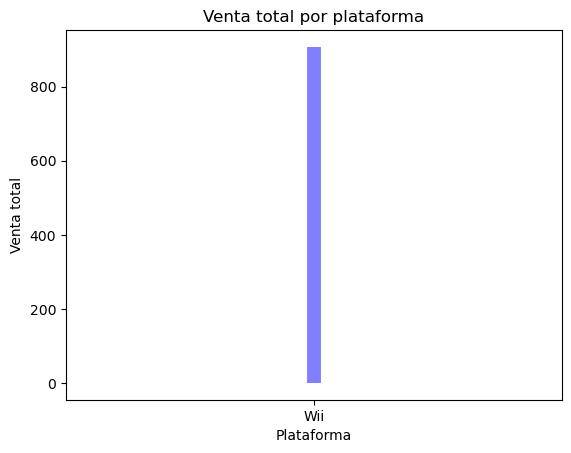

In [26]:
wii_data = sales_for_platform[sales_for_platform['platform'] == 'Wii']

plt.vlines(x=wii_data['platform'], ymin=0, ymax=wii_data['venta_total'], alpha=0.5, color='blue', linewidth=10)
plt.title('Venta total por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Venta total')
plt.show()

In [27]:
sales_for_platform['z_score'] = (sales_for_platform['venta_total']-sales_for_platform['venta_total'].mean())/sales_for_platform['venta_total'].std()

In [28]:
sales_for_platform['color'] = ['red' if puntaje <= 0 else 'green' for puntaje in sales_for_platform['z_score']]

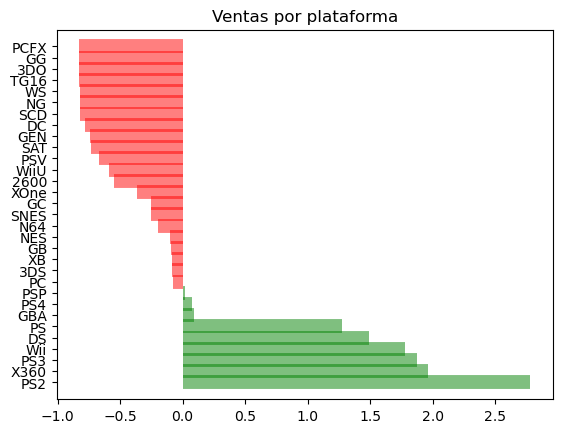

In [29]:
plt.hlines(
    y= sales_for_platform.platform,
    xmin= 0,
    xmax= sales_for_platform.z_score,
    color = sales_for_platform.color,
    linewidth = 10,
    alpha=0.5
    


)

plt.title('Ventas por plataforma')
plt.show()

In [30]:
life_time_platform = pd.pivot_table(
    data_raw,
    index='year_of_release',
    columns= 'platform',
    values='venta_total',
    aggfunc='sum'
).fillna(0)

In [31]:
life_time_platform.query('year_of_release > 0', inplace=True)
life_time_platform

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


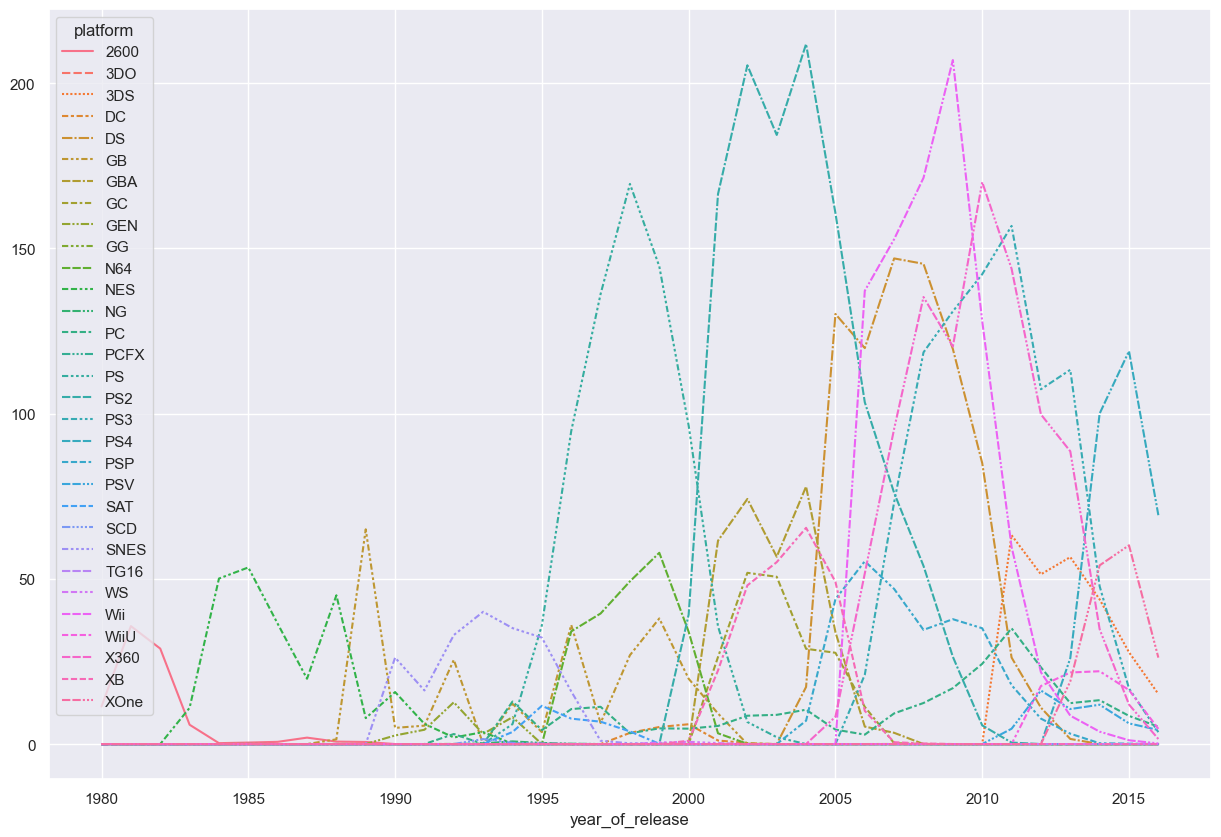

In [32]:
sns.set_theme(rc={'figure.figsize': (15,10)})
sns.lineplot(
    data= life_time_platform
)
plt.show()

In [33]:
clean_data = data_raw[data_raw['year_of_release']>=2012]

<div style="background-color: lightblue; color: black; padding: 10px; border-radius: 5px;">
    <strong>En este punto filtro los datos para años mayores a 2012, donde centrarè mi análisis.</strong>
</div>


In [34]:
clean_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,venta_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Rating Desconocido,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Rating Desconocido,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Rating Desconocido,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Rating Desconocido,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Rating Desconocido,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Rating Desconocido,0.01


In [35]:
new_life_time = clean_data.pivot_table(
    index='year_of_release',
    columns='platform',
    values= 'venta_total',
    aggfunc='sum'
).fillna(0)

<Axes: xlabel='year_of_release'>

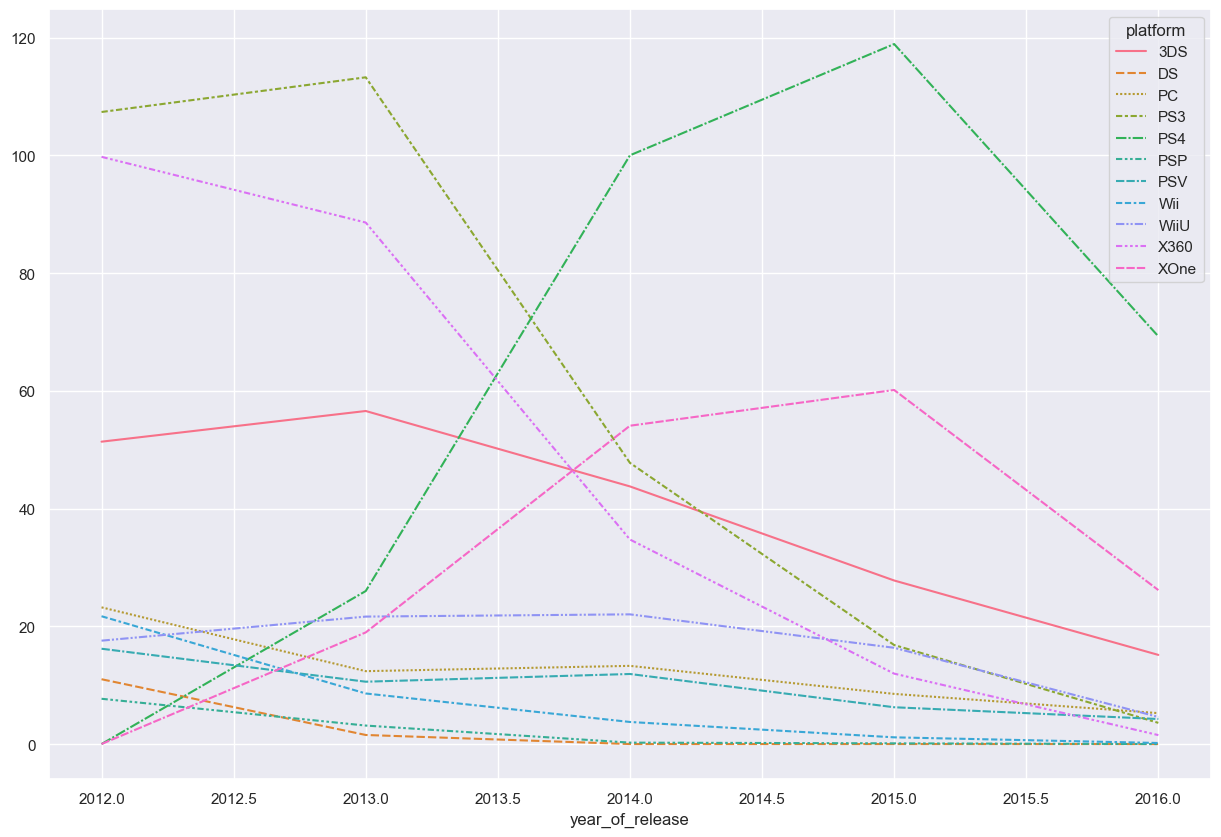

In [36]:
sns.lineplot(data=new_life_time)

In [37]:
box_plot_data = clean_data.groupby(['year_of_release', 'platform']).agg({'venta_total': 'sum'}).reset_index()
box_plot_data

,year_of_release,platform,venta_total
0,2012,3DS,51.36
1,2012,DS,11.01
2,2012,PC,23.22
3,2012,PS3,107.36
4,2012,PSP,7.69
5,2012,PSV,16.19
6,2012,Wii,21.71
7,2012,WiiU,17.56
8,2012,X360,99.74
9,2013,3DS,56.57


<Axes: xlabel='platform', ylabel='venta_total'>

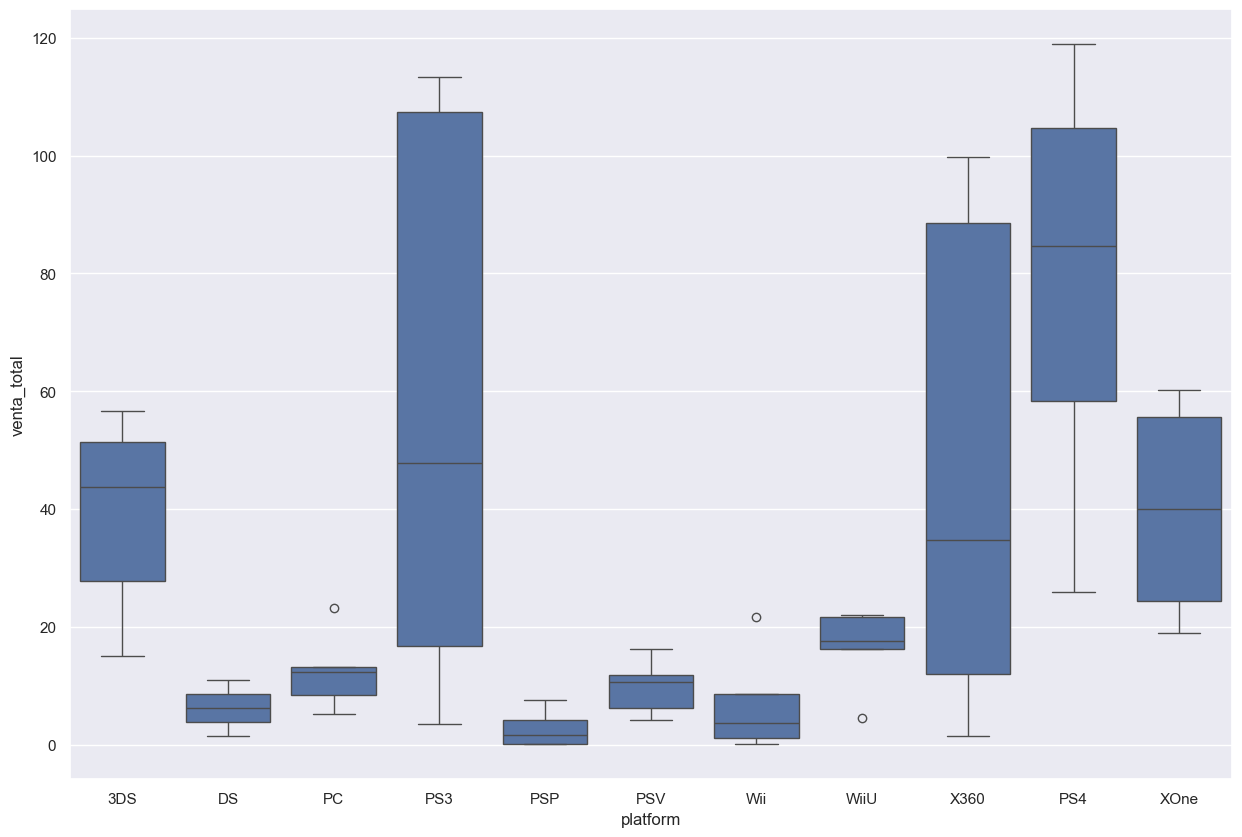

In [38]:
sns.boxplot(data=box_plot_data, x='platform', y='venta_total')

In [39]:
ps4 = clean_data.groupby(['platform', 'name'])[['venta_total', 'critic_score','user_score']].sum().query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()

In [40]:
ps4

,platform,name,venta_total,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.0,5.9
1,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,7.8
2,PS4,Agatha Christie's The ABC Murders,0.02,67.0,6.2
3,PS4,Alien: Isolation,1.12,79.0,8.1
4,PS4,Angry Birds Star Wars,0.22,47.0,2.0
...,...,...,...,...,...
244,PS4,World of Final Fantasy,0.34,77.0,8.3
245,PS4,Worms: WMD,0.03,78.0,7.6
246,PS4,XCOM 2,0.14,88.0,8.0
247,PS4,Zombie Army Trilogy,0.20,62.0,6.8


In [41]:
ps4_corr = ps4['venta_total'].corr(ps4['critic_score'])

In [42]:
print(f"Para la plataforma ps4 la correlación del puntaje de la critica es: {ps4_corr}")

Para la plataforma ps4 la correlación del puntaje de la critica es: 0.4058948014583666


<Axes: xlabel='critic_score', ylabel='venta_total'>

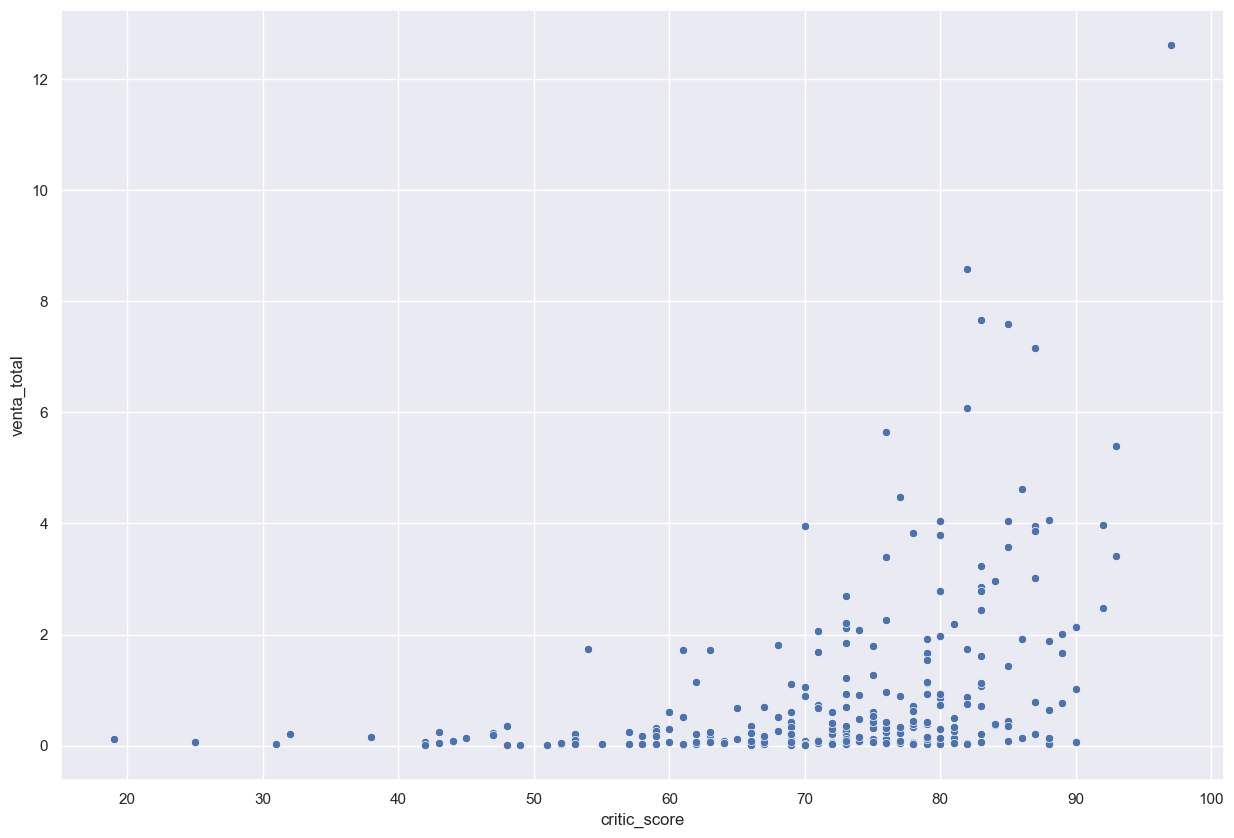

In [43]:
sns.scatterplot(data=ps4, x='critic_score', y='venta_total')

In [44]:
xbox_one = clean_data.groupby(['platform', 'name'])[['venta_total', 'critic_score','user_score']].sum().query('platform == "XOne" & critic_score > 0 & user_score > 0').reset_index()
xbox_one_corr = xbox_one['venta_total'].corr(xbox_one['user_score'])

In [45]:
xbox_one_corr

-0.09400318326920865

<Axes: xlabel='critic_score', ylabel='venta_total'>

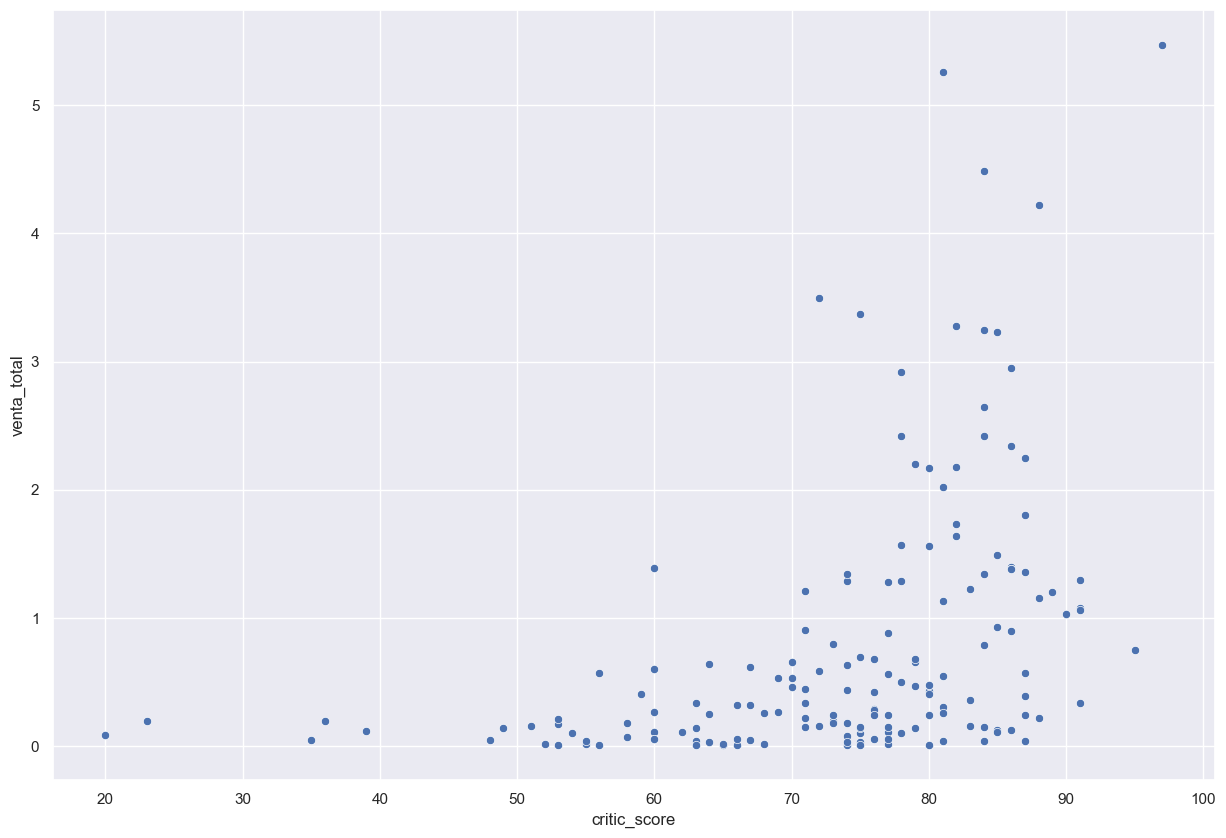

In [46]:
sns.scatterplot(data=xbox_one, x='critic_score', y='venta_total')

In [47]:
def correlación(platform):
    data= clean_data[clean_data['platform'] == platform]

    corr = data[['critic_score', 'user_score', 'venta_total']].corr()['venta_total']

    data.plot(y='venta_total', x='critic_score', kind= 'scatter', grid=True)

    data.plot(y= 'venta_total', x='user_score', kind= 'scatter', grid=True)
    plt.title(platform)
    print(platform, '\n', corr)
    print('-----------------')

<div style="background-color: lightblue; color: black; padding: 10px; border-radius: 5px;">
    <strong>En este punto, creo una funciona para graficar la correlación de las plataformas con las criticas del usuario en user_id.</strong>
</div>


In [48]:
plataformas = ['PS4', 'WiiU', 'XOne', 'PS3', 'X360','Wii' ]

PS4 
 critic_score    0.406568
user_score     -0.031957
venta_total     1.000000
Name: venta_total, dtype: float64
-----------------
WiiU 
 critic_score    0.348380
user_score      0.400219
venta_total     1.000000
Name: venta_total, dtype: float64
-----------------
XOne 
 critic_score    0.416998
user_score     -0.068925
venta_total     1.000000
Name: venta_total, dtype: float64
-----------------
PS3 
 critic_score    0.331497
user_score     -0.005144
venta_total     1.000000
Name: venta_total, dtype: float64
-----------------
X360 
 critic_score    0.360573
user_score      0.006164
venta_total     1.000000
Name: venta_total, dtype: float64
-----------------
Wii 
 critic_score   -0.424341
user_score      0.296197
venta_total     1.000000
Name: venta_total, dtype: float64
-----------------


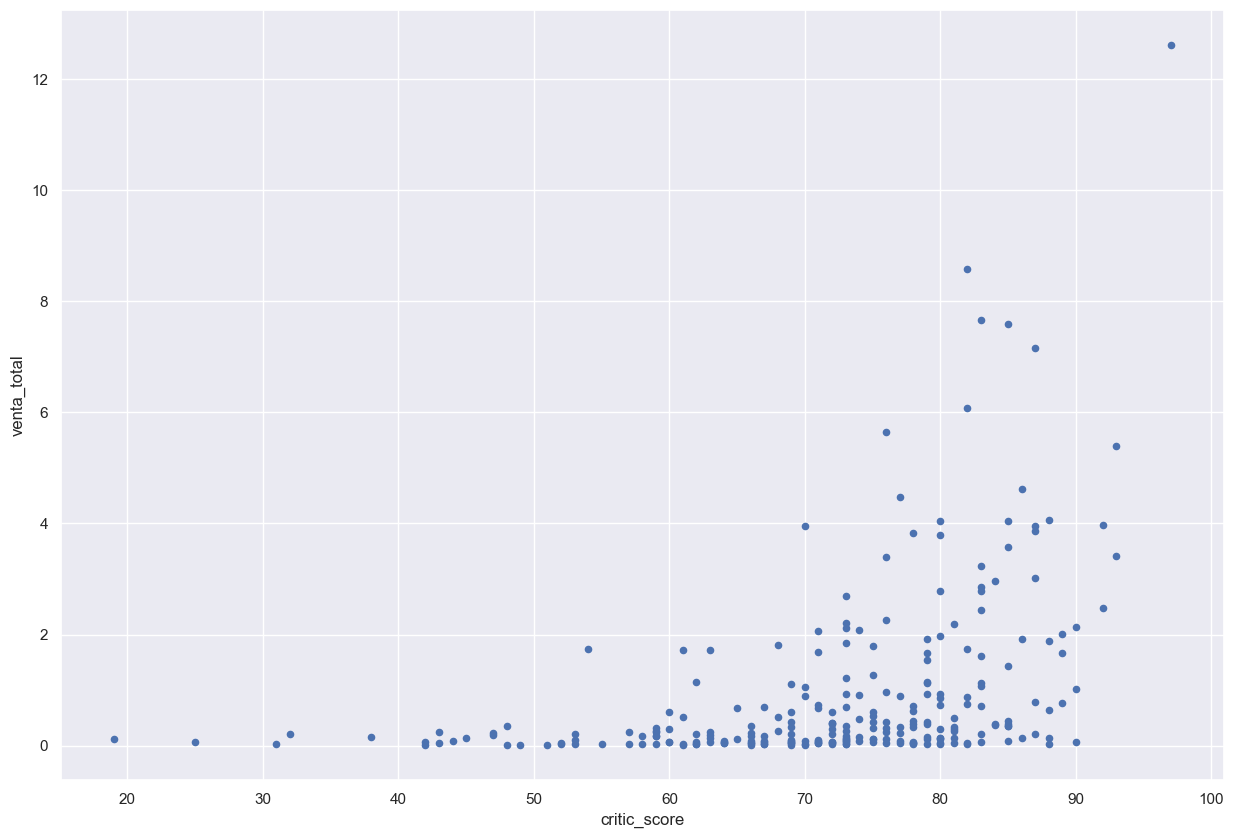

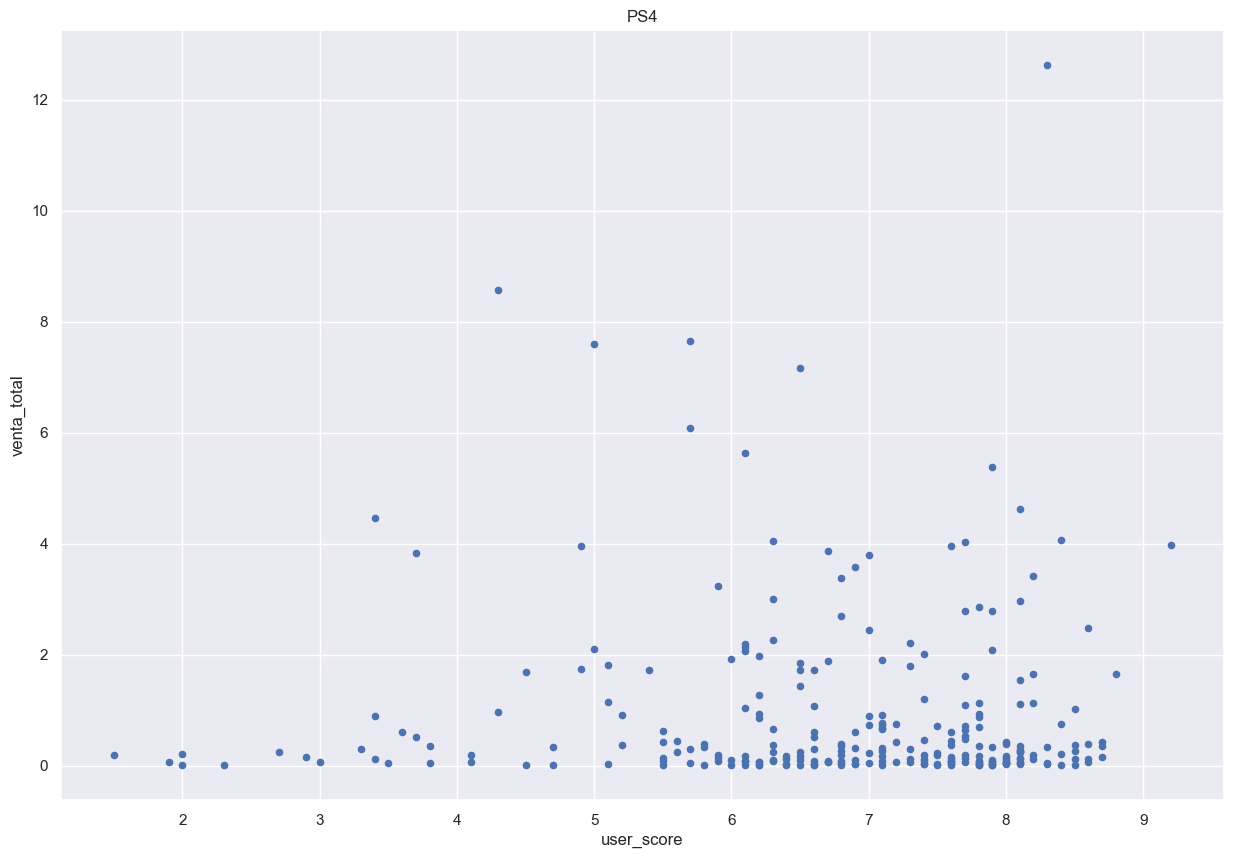

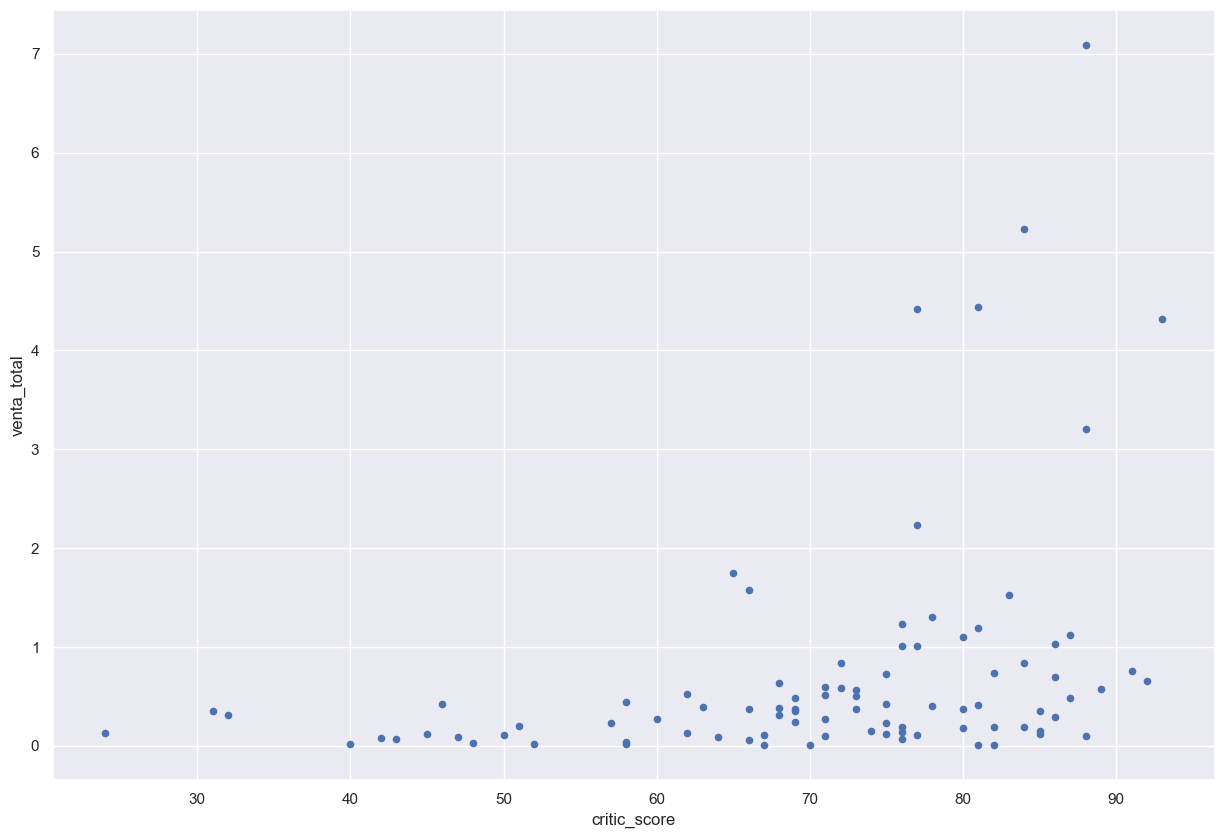

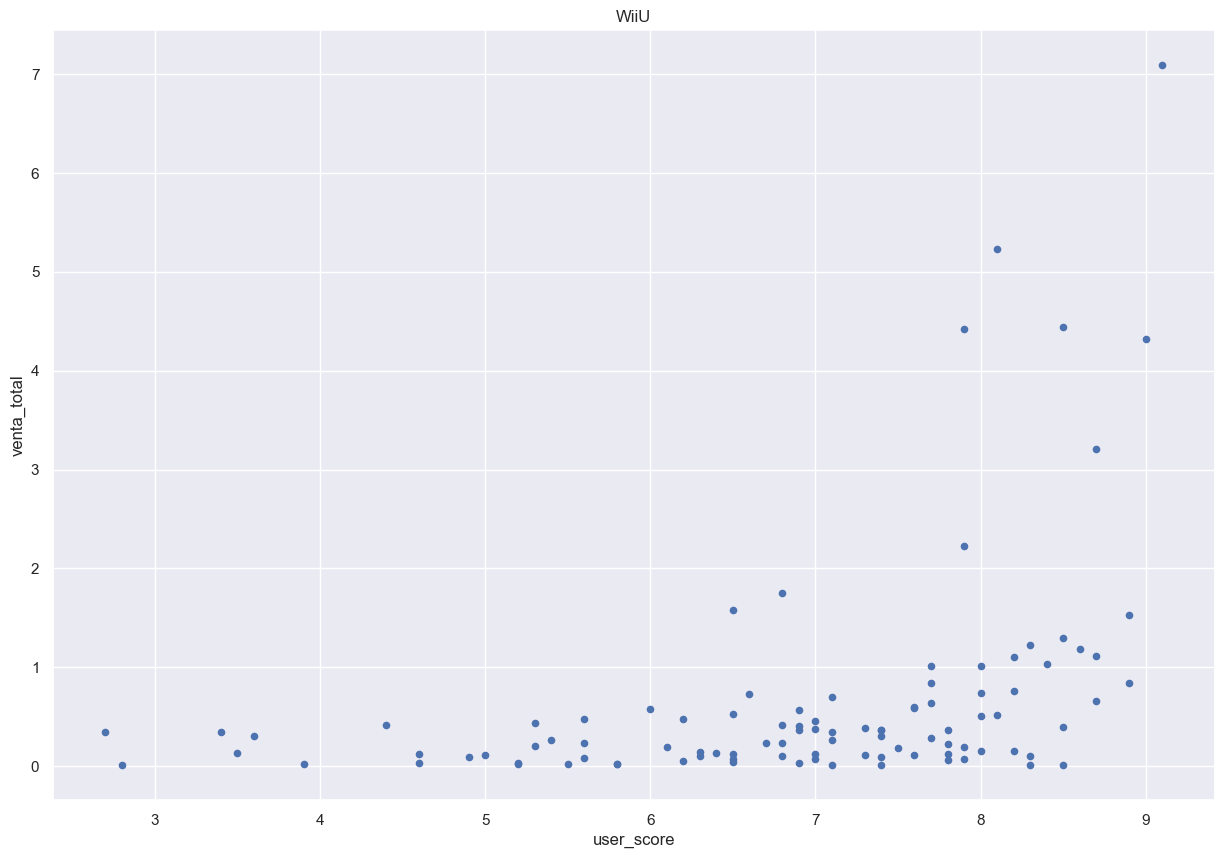

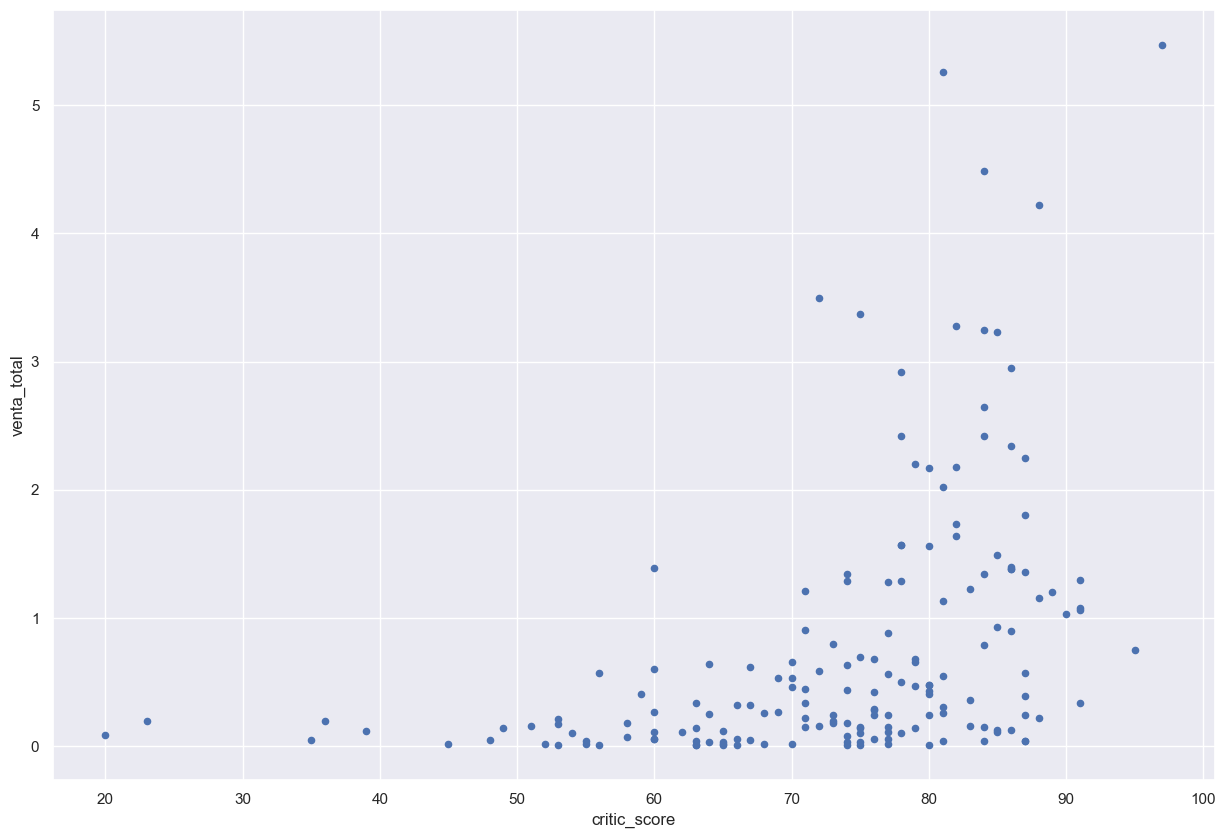

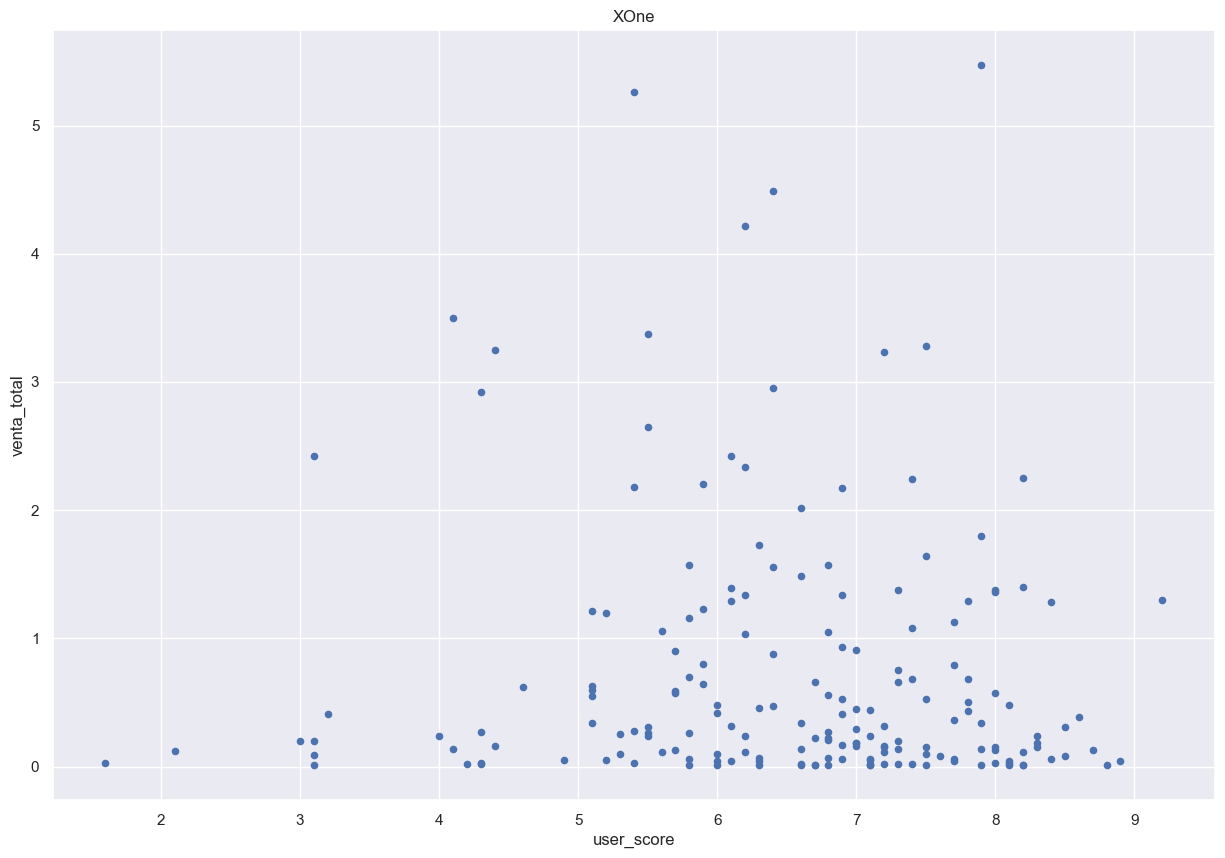

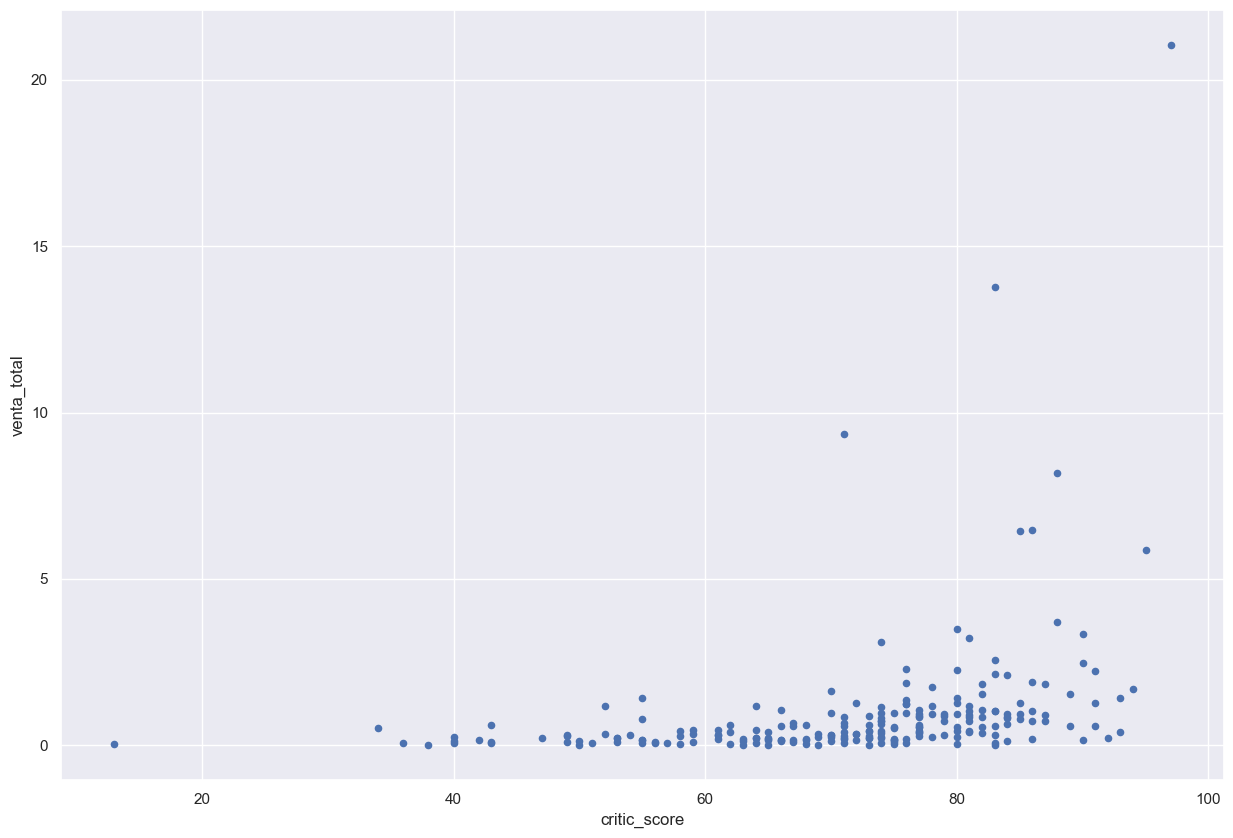

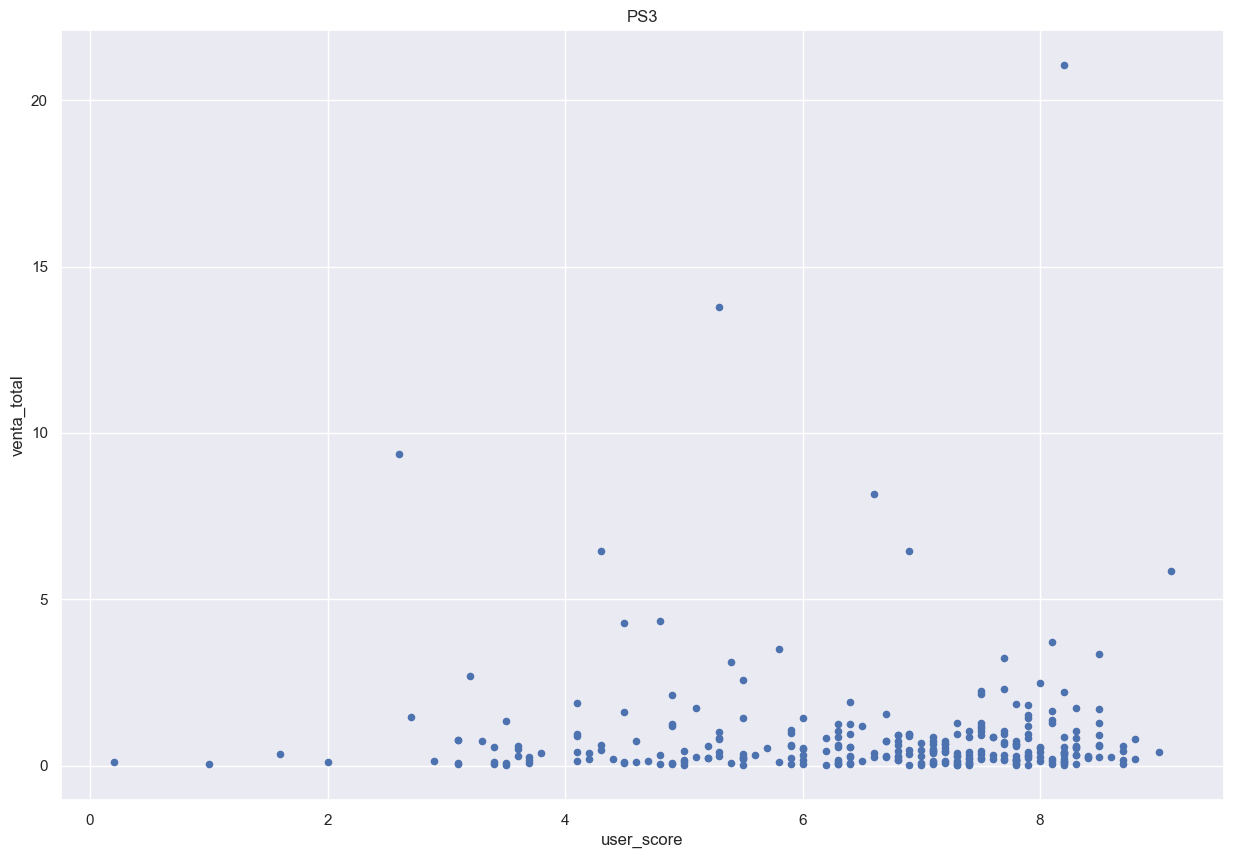

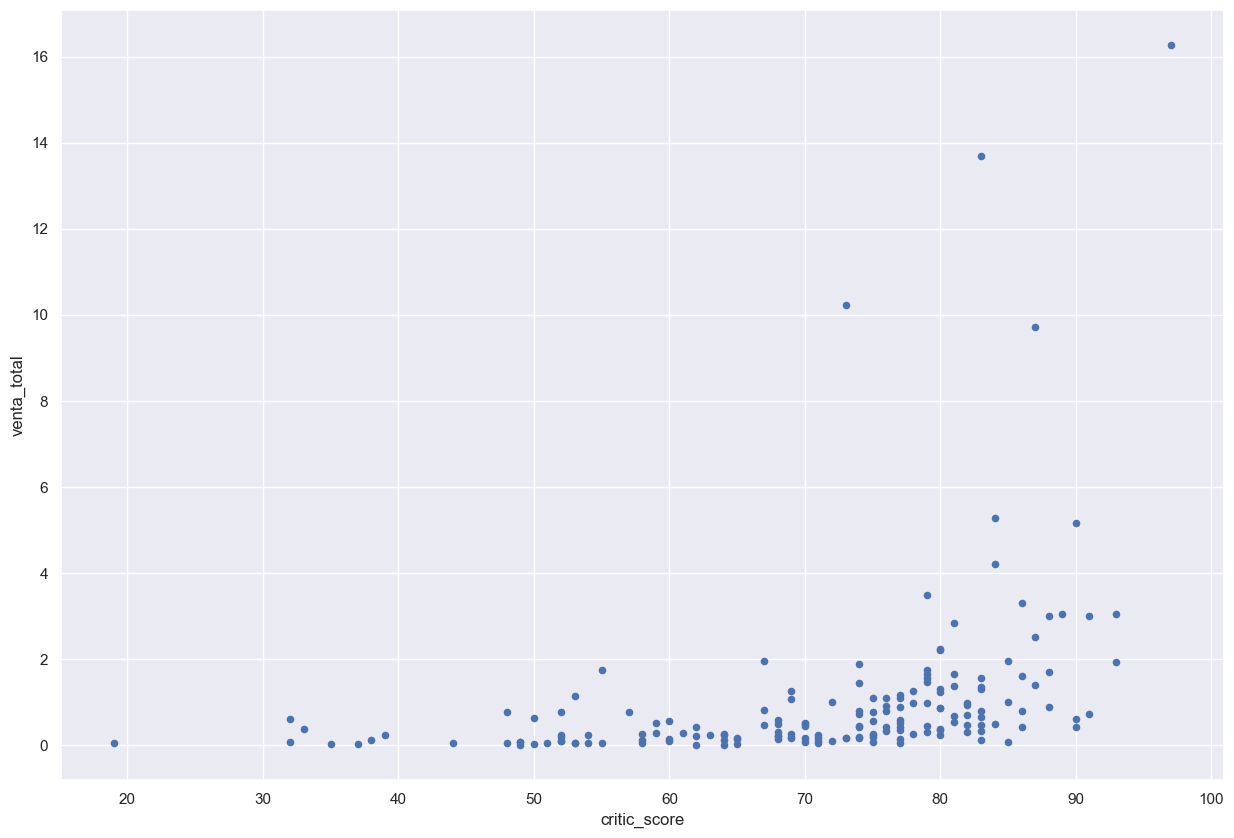

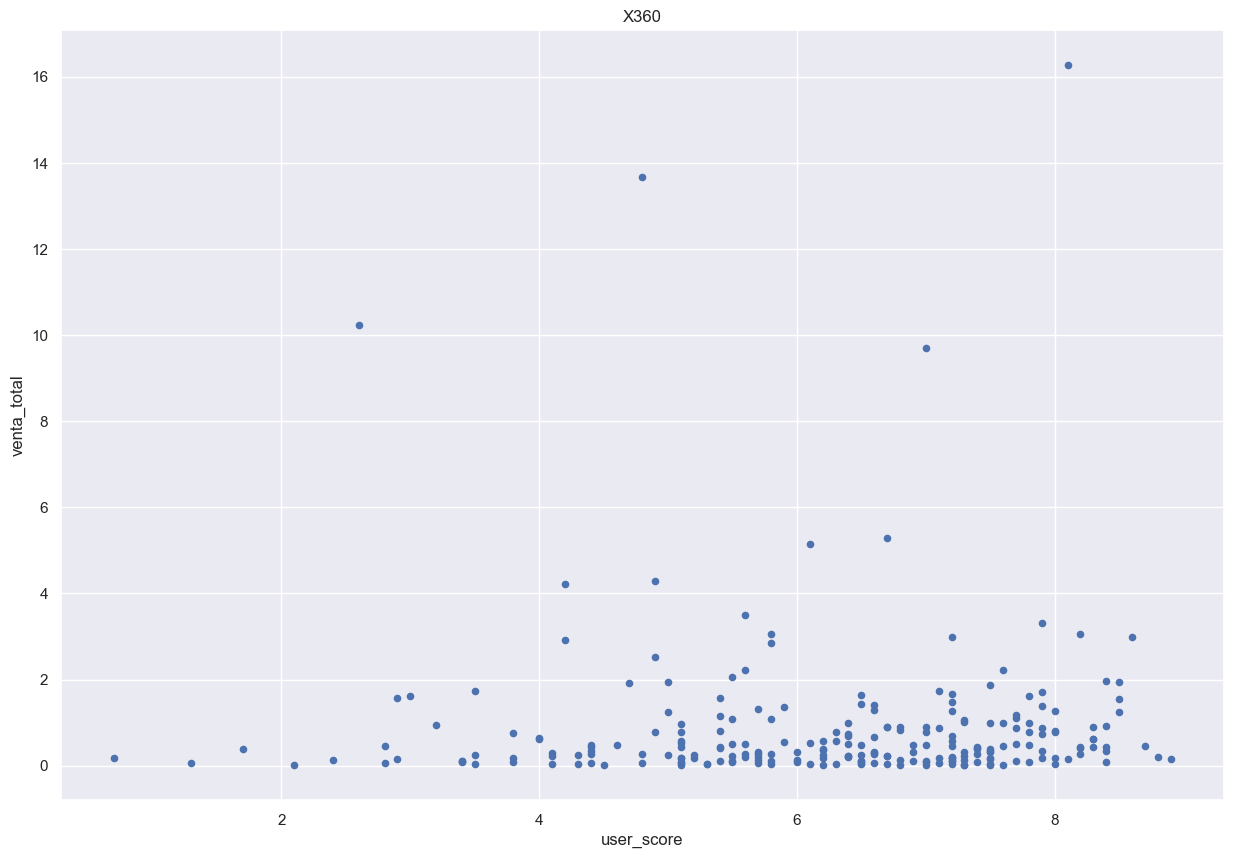

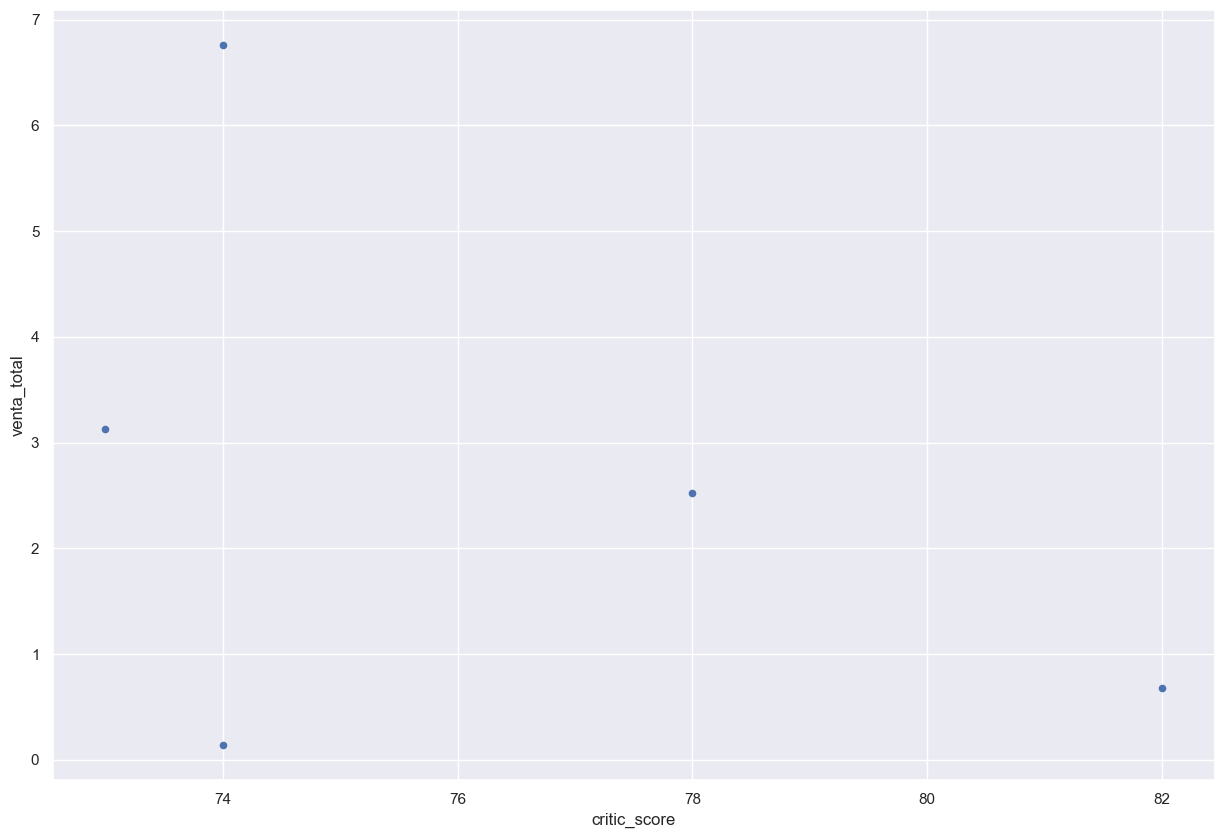

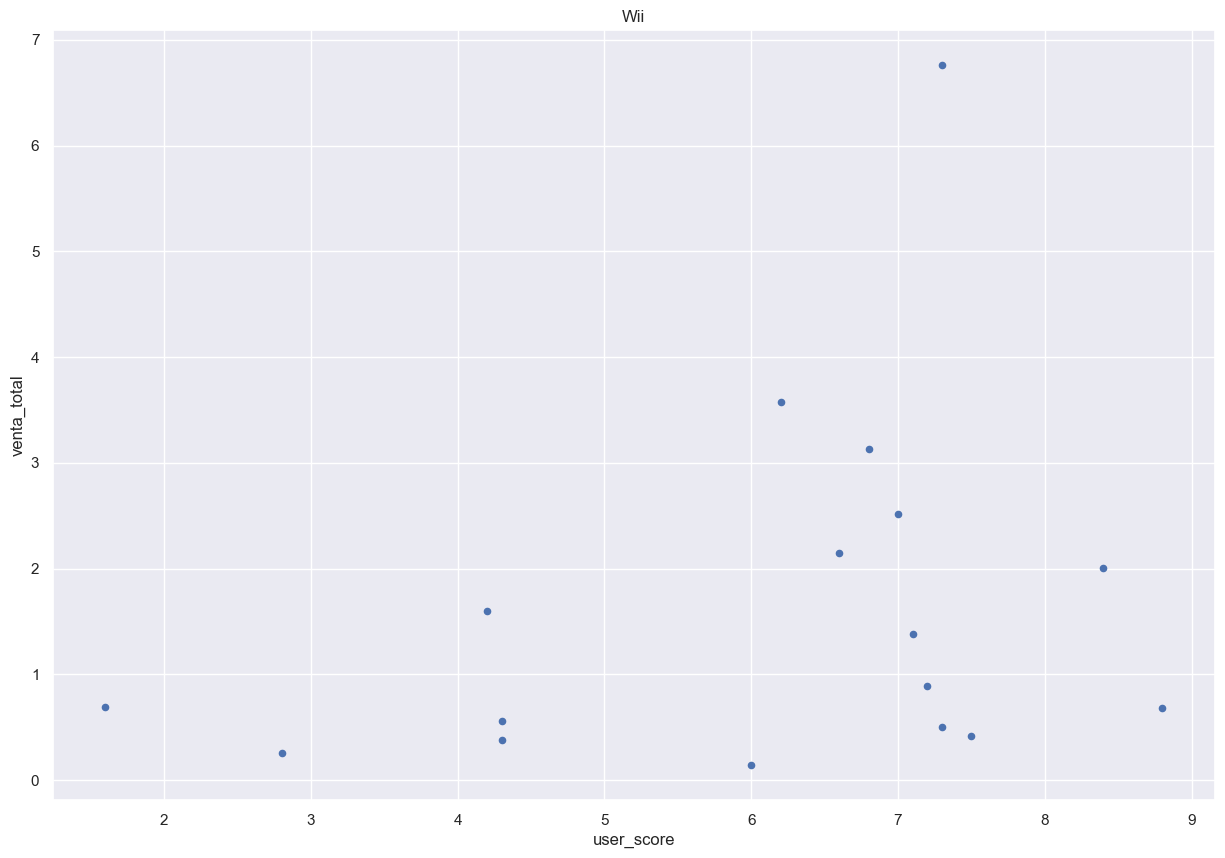

In [49]:
for platforms in plataformas:
    correlación(platforms)

In [50]:
datos_group_genero = clean_data.groupby(['genre', 'name'])['venta_total'].sum().reset_index()
datos_group_genero.query('1< venta_total<10', inplace=True)

<Axes: xlabel='genre', ylabel='venta_total'>

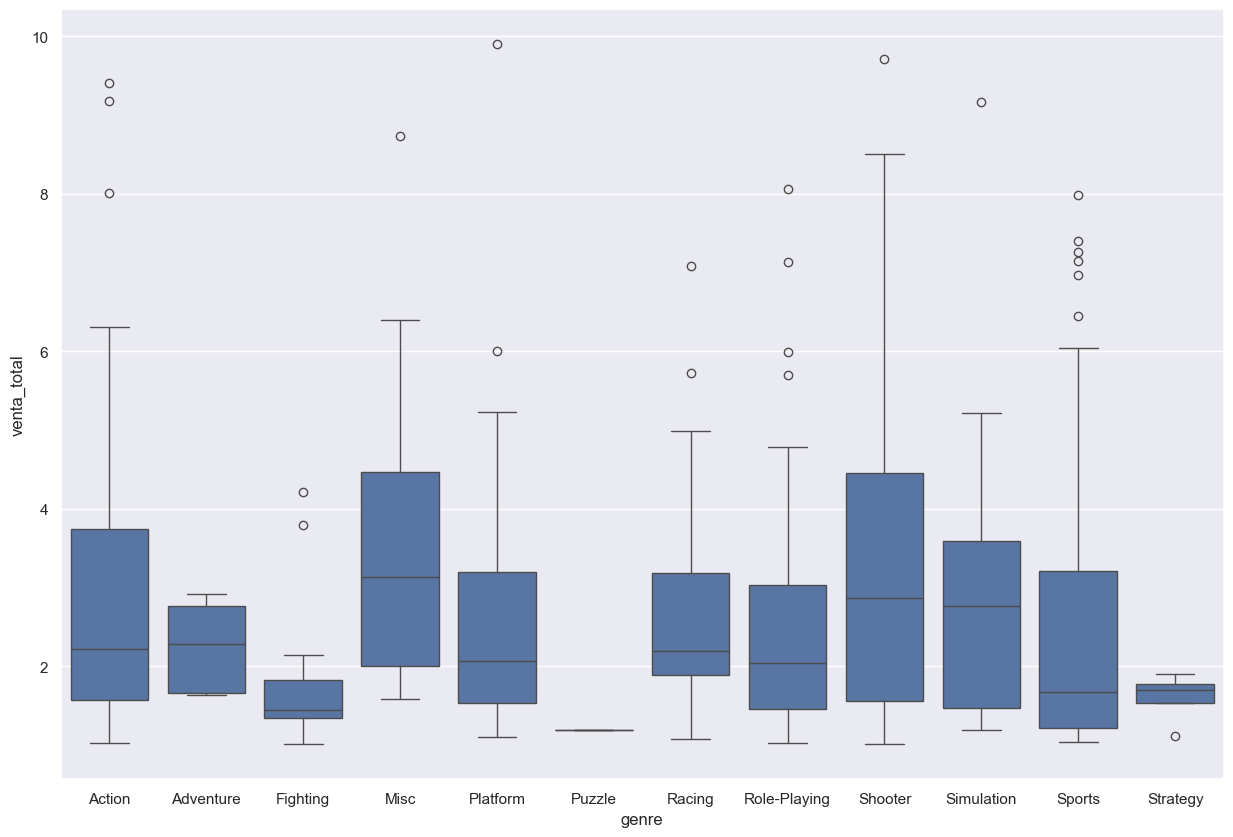

In [51]:
sns.boxplot(x='genre', y='venta_total', data= datos_group_genero)

## Las 5 plataformas principales.

In [52]:
na_platform = clean_data.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)


In [53]:
na_platform.head()


,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


In [54]:
na_platform.sum()

platform    X360PS4PS3XOne3DSWiiUPCWiiPSVDSPSP
na_sales                                590.97
dtype: object

In [55]:
na_platform['na_market_share'] = na_platform['na_sales'] * 100 / na_platform.sum()['na_sales']

In [56]:
na_platform

,platform,na_sales,na_market_share
9,X360,140.05,23.698326
4,PS4,108.74,18.400257
3,PS3,103.38,17.493274
10,XOne,93.12,15.757145
0,3DS,55.31,9.359189
8,WiiU,38.10,6.447028
2,PC,19.12,3.235359
7,Wii,17.45,2.952773
6,PSV,10.98,1.857962
1,DS,4.59,0.776689


In [57]:
eu_platform = clean_data.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)


In [58]:
eu_platform['eu_market_share'] = eu_platform['eu_sales'] * 100 / eu_platform.sum()['eu_sales']

In [59]:
eu_platform.head()

,platform,eu_sales,eu_market_share
4,PS4,141.09,27.838286
3,PS3,106.86,21.084409
9,X360,74.52,14.703445
10,XOne,51.59,10.179156
0,3DS,42.64,8.413243


In [60]:
jp_platform = clean_data.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)


In [61]:
jp_platform['jp_market_share'] = jp_platform['jp_sales'] * 100 / jp_platform.sum()['jp_sales']

In [62]:
jp_platform.head()

,platform,jp_sales,jp_market_share
0,3DS,87.79,45.586250
3,PS3,35.29,18.324852
6,PSV,21.04,10.925330
4,PS4,15.96,8.287465
8,WiiU,13.01,6.755634


## Los 5 géneros principales

In [63]:
na_top_genres = clean_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 géneros en Norte America:") 

print(na_top_genres)

Top 5 géneros en Norte America:
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64


In [64]:
eu_top_genres = clean_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 géneros en Europa:") 

print(eu_top_genres)

Top 5 géneros en Europa:
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64


In [65]:
jp_top_genres = clean_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 géneros en Japón:") 

print(jp_top_genres)

Top 5 géneros en Japón:
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


## Hipotesis

In [66]:
alpha = 0.05
xbox_one_scores = clean_data[(clean_data['platform'] == 'XOne') & (clean_data['user_score'].notnull())]['user_score']
pc_scores = clean_data[(clean_data['platform'] == 'PC') & (clean_data['user_score'].notnull())]['user_score']


t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)


print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')


if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: las calificaciones promedio son iguales.")

Estadístico t: 0.5998585993590415
Valor p: 0.5489537965134912
No se puede rechazar la hipótesis nula: las calificaciones promedio son iguales.


### Como podemos observar arriba a hipòtesis queda descartada ya que las clasificaciones promedio son iguales.

### Conclusión General

El análisis de los datos de videojuegos de la tienda **Ice** nos ha permitido identificar patrones importantes sobre el comportamiento de las plataformas, géneros, y el impacto de las reseñas y clasificaciones ESRB en las ventas en distintas regiones del mundo.

1. **Distribución por plataformas y regiones:**
   - En Norteamérica (NA) y Europa (EU), las plataformas con mayores ventas fueron PlayStation y Xbox, mientras que en Japón (JP) las plataformas de Nintendo dominaron el mercado, reflejando diferencias significativas en las preferencias de hardware entre regiones.
   - Las plataformas más antiguas han ido desapareciendo a medida que emergen nuevas plataformas. Este ciclo de renovación suele tomar varios años, lo que refleja un comportamiento típico del mercado de videojuegos.

2. **Preferencias por géneros:**
   - Los géneros más populares variaron significativamente entre regiones. En NA y EU, los juegos de Acción y Deportes encabezaron las listas, mientras que en Japón los juegos de Rol (RPG) dominaron las ventas.
   - Esta variación regional es importante para la planificación de campañas publicitarias y la personalización del contenido según el mercado objetivo.

3. **Pruebas de hipótesis:**
   - Al probar la hipótesis sobre si las calificaciones promedio de los usuarios de Xbox One y PC eran iguales, no pudimos rechazar la hipótesis nula. Esto indica que las calificaciones de los usuarios en ambas plataformas son estadísticamente similares.
   - Las pruebas de hipótesis sobre las diferencias en las calificaciones de los géneros de Acción y Deportes podrían arrojar resultados distintos, pero es necesario realizar el análisis específico para estas categorías.
